# 1. Read, clean, and validate

## Dataframes and Series

In [1]:
import pandas as pd
df = pd.read_hdf('data/nsfg.hdf5', 'nsfg')
type(df)

pandas.core.frame.DataFrame

In [2]:
df.head()

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


In [3]:
df.shape

(9358, 10)

In [4]:
df.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

In [5]:
pounds = df['birthwgt_lb1'] 
type(pounds)

pandas.core.series.Series

In [6]:
pounds.head()

0    5.0
1    4.0
2    5.0
3    NaN
4    8.0
Name: birthwgt_lb1, dtype: float64

## Clean and Validate

<img src="./data/img.jpg" alt="" width="800" align="left"/>
<img src="./data/img0.jpg" alt="" width="600" align="left"/>

In [7]:
ounces = df['birthwgt_oz1']

In [8]:
pounds.value_counts().sort_index()

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64

In [9]:
ounces.describe()

count    6391.000000
mean        7.213895
std         8.254885
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        99.000000
Name: birthwgt_oz1, dtype: float64

In [10]:
import numpy as np
pounds = pounds.replace([98,99], np.nan)
ounces.replace([98,99], np.nan, inplace = True)

In [11]:
birth_weight = pounds + ounces/16.0
birth_weight.describe()

count    6355.000000
mean        7.120978
std         1.422236
min         0.000000
25%         6.375000
50%         7.187500
75%         8.000000
max        17.937500
dtype: float64

## Filter and Visualize

In [12]:
import matplotlib.pyplot as plt

plt.hist(birth_weight.dropna(), bins = 30)

plt.xlabel('Birth Weight (lb)')
plt.ylabel('fraction of birth')

plt.show()

<Figure size 640x480 with 1 Axes>

In [13]:
preterm = df['prglngth'] < 37
preterm.head()

0    False
1     True
2     True
3     True
4    False
Name: prglngth, dtype: bool

In [14]:
preterm.sum()

3742

In [15]:
preterm.mean()

0.39987176747168196

In [16]:
preterm_weight = birth_weight[preterm]
preterm_weight.mean()

5.577598314606742

In [17]:
full_term_weight = birth_weight[~preterm]
full_term_weight.mean()

7.372323879231473

**SAMPLING**

# 2. Distributions
## Probability mass function

In [18]:
gss = pd.read_hdf('data/gss.hdf5')
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


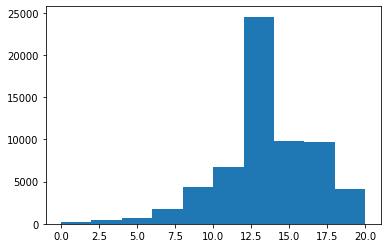

In [19]:
educ = gss['educ']

plt.hist(educ.dropna(), label = 'educ')

plt.show()

In [20]:
pmf_educ = educ.value_counts().sort_index()
pmf_educ

0.0       144
1.0        38
2.0       151
3.0       246
4.0       290
5.0       379
6.0       842
7.0       860
8.0      2421
9.0      1963
10.0     2819
11.0     3864
12.0    19145
13.0     5405
14.0     6980
15.0     2836
16.0     7953
17.0     1791
18.0     2109
19.0      774
20.0     1294
Name: educ, dtype: int64

In [21]:
pmf_educ[12]

19145

In [22]:
educ.value_counts(normalize = True).sort_index()

0.0     0.002311
1.0     0.000610
2.0     0.002424
3.0     0.003948
4.0     0.004655
5.0     0.006083
6.0     0.013514
7.0     0.013803
8.0     0.038858
9.0     0.031507
10.0    0.045246
11.0    0.062018
12.0    0.307284
13.0    0.086752
14.0    0.112031
15.0    0.045519
16.0    0.127648
17.0    0.028746
18.0    0.033850
19.0    0.012423
20.0    0.020769
Name: educ, dtype: float64

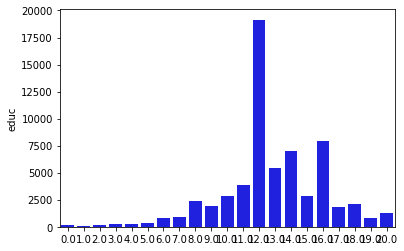

In [23]:
import seaborn as sns

sns.barplot(x = pmf_educ.index, y = pmf_educ, color = 'blue', )

plt.show()

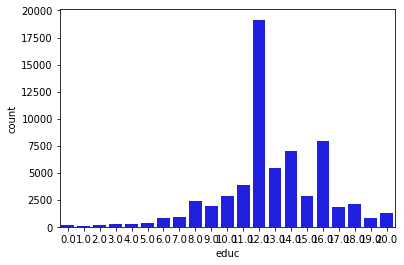

In [24]:
sns.countplot(x = 'educ', data = gss, color = 'blue')

plt.show()

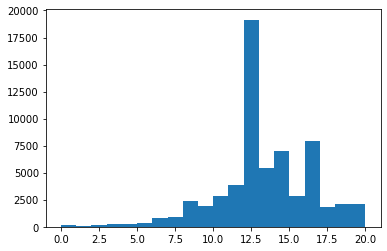

In [25]:
plt.hist(educ.dropna(), bins = 20)

plt.show()

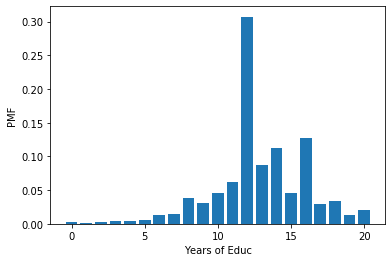

In [26]:
from empiricaldist import Pmf

pmf_educ = Pmf.from_seq(educ, normalize = True)

pmf_educ.bar()

plt.xlabel("Years of Educ")
plt.ylabel("PMF")

plt.show()

## Cumulative distribution functions

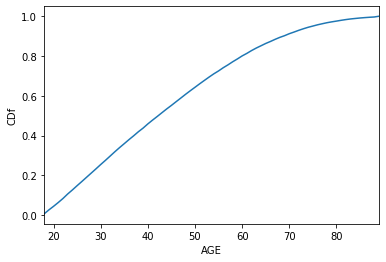

In [27]:
from empiricaldist import Cdf

age = gss['age']

cdf_age = Cdf.from_seq(age)

cdf_age.plot()

plt.xlabel("AGE")
plt.ylabel("CDf")

plt.show()

the prob of respondandt age being 51 or younger

In [28]:
p = cdf_age(51)
p

array(0.66020135)

what's the age below which are 75% of respondandt ages

In [29]:
age = cdf_age.inverse(0.75)
age

array(57.)

## Comparing distributions

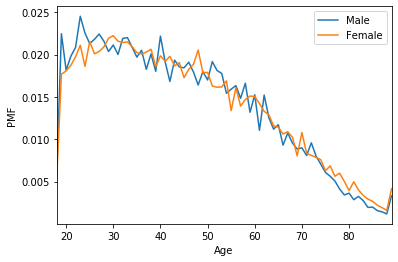

In [30]:
male = gss['sex'] == 1
female = ~male

male_age = gss.loc[male,'age']
female_age = gss.loc[female,'age']

Pmf.from_seq(male_age).plot(label = 'Male')
Pmf.from_seq(female_age).plot(label = 'Female')

plt.xlabel("Age")
plt.ylabel("PMF")
plt.legend()

plt.show()

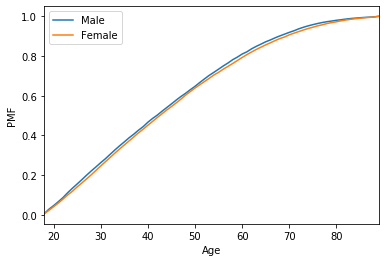

In [31]:
Cdf.from_seq(male_age).plot(label = 'Male')
Cdf.from_seq(female_age).plot(label = 'Female')

plt.xlabel("Age")
plt.ylabel("PMF")
plt.legend()

plt.show()

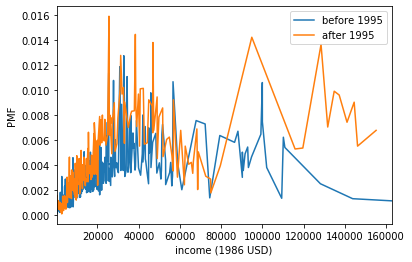

In [32]:
income = gss['realinc']
pre95 = gss['year'] < 1995

Pmf.from_seq(income[pre95]).plot(label = 'before 1995')
Pmf.from_seq(income[~pre95]).plot(label = 'after 1995')

plt.xlabel('income (1986 USD)')
plt.ylabel('PMF')
plt.legend()

plt.show()

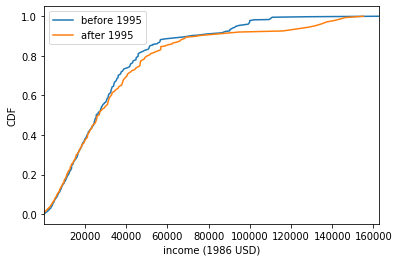

In [33]:
Cdf.from_seq(income[pre95]).plot(label = 'before 1995')
Cdf.from_seq(income[~pre95]).plot(label = 'after 1995')

plt.xlabel('income (1986 USD)')
plt.ylabel('CDF')
plt.legend()

plt.show()

##  Modeling distributions

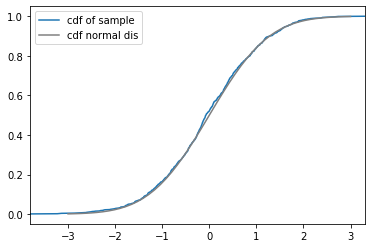

In [34]:
#draw a sample from normal distribution
sample = np.random.normal(size = 1000)
Cdf.from_seq(sample).plot(label = 'cdf of sample')

from scipy.stats import norm

#equaliy spaced points to calculate cdf at
points = np.linspace(-3,3)
#calc cdf for points of normal distribution of mean = 0 and std = 1
cdf_points = norm(0,1).cdf(points)
plt.plot(points, cdf_points, color = 'grey', label = 'cdf normal dis')

plt.legend()
plt.show()

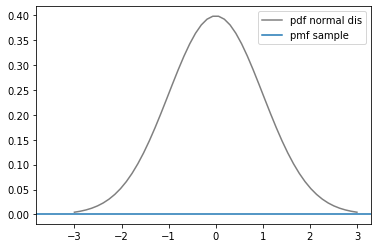

In [35]:
#pdf of the sample is flat line as the sample contains unique numbers

pdf = norm(0,1).pdf(points)
plt.plot(points, pdf, color = 'grey', label = 'pdf normal dis')
Pmf.from_seq(sample).plot(label = 'pmf sample')

plt.legend()
plt.show()

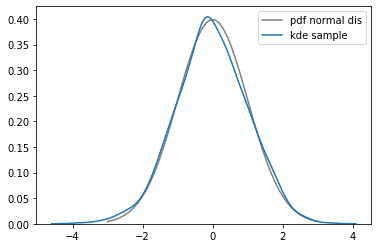

In [36]:
pdf = norm(0,1).pdf(points)
plt.plot(points, pdf, color = 'grey', label = 'pdf normal dis')
sns.kdeplot(sample, label = 'kde sample')

plt.legend()
plt.show()

# 3. Relationships
## Exploring relationships

So far we have only looked at one variable at a time. Now it's time to explore relationships between variables.
As a first example, we'll look at the relationship between height and weight. I'll use data from the Behavioral Risk Factor Surveillance Survey, or BRFSS, which is run by the Centers for Disease Contro

In [37]:
brfss = pd.read_hdf('data/brfss.hdf5')
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [38]:
brfss.columns

Index(['SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT', '_AGEG5YR', '_VEGESU1',
       '_HTMG10', 'AGE'],
      dtype='object')

A common way to visualize the relationship between two variables is a scatter plot, but they are surprisingly hard to get right.

pyplot provides a `scatter()` function that makes a scatter plot, but it is more versatile than we need and slower than we want. It is faster to use `plot()` with the format string `'o'`, **which plots a circle for each data point**.

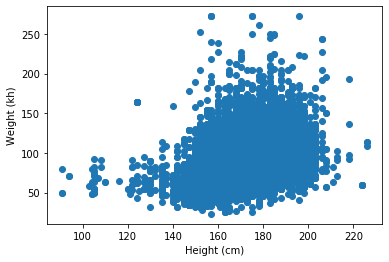

In [39]:
height = brfss['HTM4']
weight = brfss['WTKG3']

plt.plot(height, weight, 'o')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kh)')
plt.show()

In general, it looks like taller people are heavier, but this scatter plot is hard to interpret. Most importantly, it is **"overplotted"**, which means that there are data points piled on top of each other so you can't tell where there are a lot of points and where there is just one. When that happens, the results can be really misleading.

- One way to improve it is to use transparency, which we can do with the **alpha** parameter. 
 
 The lower the value of alpha, the more transparent each data point is. Here's what it looks like with `alpha=0.02` . 
 This is better, but there are so many data points, the scatter plot is still overplotted. The next step is to make the markers smaller.

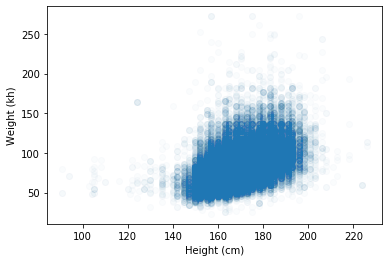

In [40]:
plt.plot(height, weight, 'o', alpha = 0.02)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kh)')
plt.show()

- With `markersize=1` and a low value of `alpha`, the scatter plot is less saturated. 

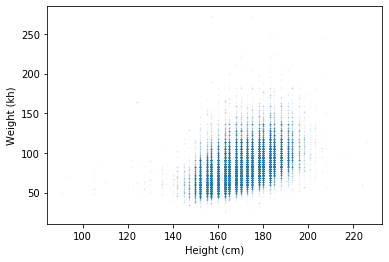

In [41]:
plt.plot(height, weight, 'o', alpha = 0.02, markersize = 1)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kh)')
plt.show()

This is better, but now we can see that the points fall in **discrete columns**. That's because most heights were reported in inches and converted to centimeters. We can break up the columns **by adding some random noise to the values**; in effect, we are filling in the values that got rounded off.

- Adding random noise like this is called **"jittering"**. I added noise with mean 0 and standard deviation 2

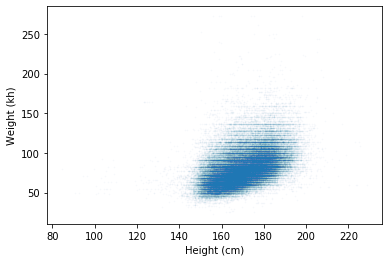

In [42]:
noise = np.random.normal(0,2,size = len(height))
height_jitter = height + noise

plt.plot(height_jitter, weight, 'o', alpha = 0.02, markersize = 1)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kh)')
plt.show()

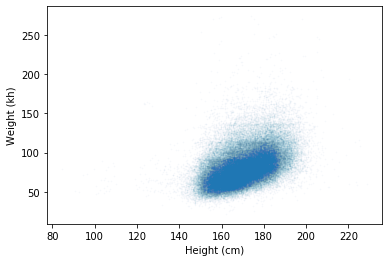

In [43]:
weight_jitter = weight + np.random.normal(0,2, size = len(weight))

plt.plot(height_jitter, weight_jitter, 'o', alpha = 0.02, markersize = 1)

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kh)')
plt.show()

- zoom in on the area where most of the data points are.

The pyplot function `axis()` sets the lower and upper bounds for the x- and y-axis;

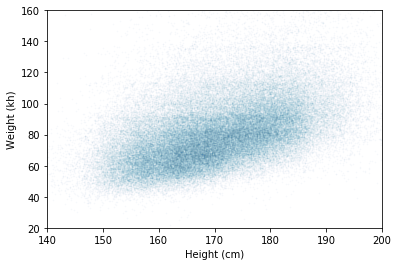

In [44]:
plt.plot(height_jitter, weight_jitter, 'o', alpha = 0.02, markersize = 1)

plt.axis([140,200,20,160])

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kh)')
plt.show()

## Visualizing relationships
- box plots
- violin plots

The `bfrss` dataset's variable, `'AGE'`,represents each respondent's age. To protect respondents' privacy, ages are rounded off into 5-year bins. '`AGE'` contains the midpoint of the bins.

so I added some random values from the normal distribution with mean = 0, std = 2.5 to the age variable

In [45]:
age = brfss['AGE']
age.value_counts().sort_index()

21.0    12566
27.0     8116
32.0     9321
37.0     8067
42.0     8039
47.0     7284
52.0     8652
57.0     8200
62.0     8182
67.0     6583
72.0     5365
77.0     4053
89.5     4366
Name: AGE, dtype: int64

In [46]:
age_jitter = age + np.random.normal(0, 0.5, size = len(age))

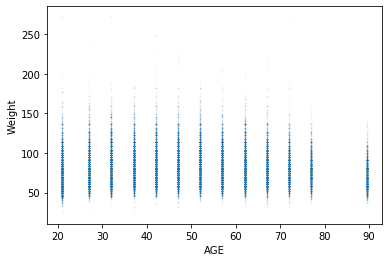

In [47]:
plt.plot(age, weight, 'o', markersize = 1, alpha = 0.02)

plt.xlabel('AGE')
plt.ylabel('Weight')
plt.show()

I made a few changes in the code: First, I reduced the marker size, because we have more data now, Second, I jittered the weights, so the horizontal rows are not visible. I jitter the ages, too, but less than in the exercise, so the data points are spread out, but there's still space between the columns. That makes it possible to see the shape of the distribution in each age group, and the differences between groups. If we take this idea one step farther, we can use KDE to estimate the density function in each column and plot it

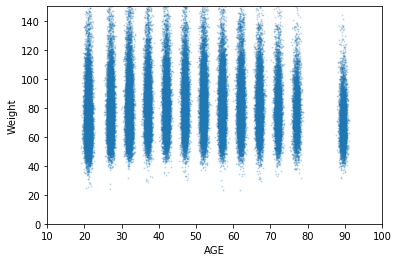

In [48]:
age_jitter = age + np.random.normal(0, 0.5, size = len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size = len(brfss))
plt.plot(age_jitter, weight_jitter, 'o', markersize = 1, alpha = 0.2)


plt.axis([10, 100, 0, 150])
plt.xlabel('AGE')
plt.ylabel('Weight')
plt.show()

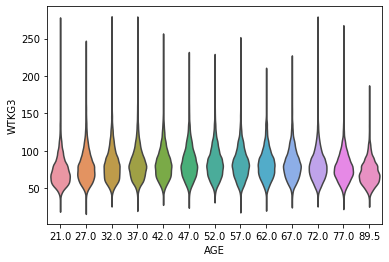

In [49]:
data = brfss.dropna(subset = ['AGE', 'WTKG3'])

sns.violinplot(x = 'AGE', y = "WTKG3", data = data, inner = None)

plt.show()

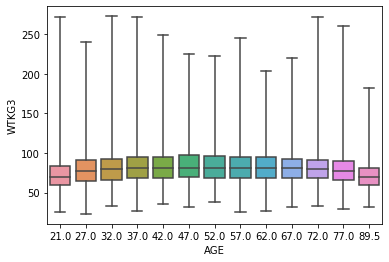

In [50]:
sns.boxplot(x = 'AGE', y = 'WTKG3', data = data, whis = 10)

plt.show()

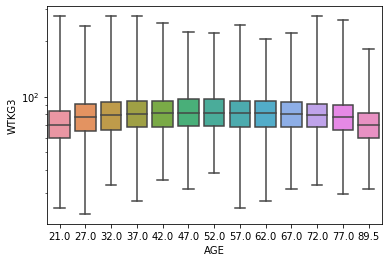

In [51]:
sns.boxplot(x = 'AGE', y = 'WTKG3', data = data, whis = 10)

plt.yscale('log')
plt.show()

## Correlation

Correlation in statistics usually means Pearson's correlation coefficient, which is a number between -1 and 1 that quantifies the strength of a **linear** relationship between variables.

In [52]:
subset = brfss[['WTKG3', 'HTM4', 'AGE']]

subset.corr()

,WTKG3,HTM4,AGE
WTKG3,1.000000,0.474203,0.021641
HTM4,0.474203,1.000000,-0.093684
AGE,0.021641,-0.093684,1.000000


The correlation between age and weight is even smaller. It is tempting to conclude that there is no relationship between age and weight, but we have already seen that there is. So why is the correlation so low?
Remember that the relationship between weight and age looks like this. People in their 40s are the heaviest; younger and older people are lighter. So this relationship is **nonlinear**.But **correlation only works for linear relationships**.

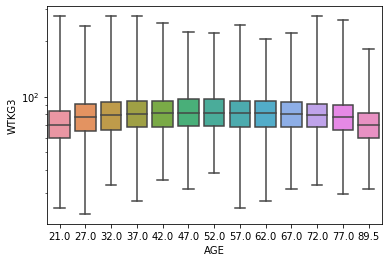

In [53]:
data = brfss.dropna(subset = ['AGE', 'WTKG3'])

sns.boxplot(x = 'AGE', y = "WTKG3", data = data, whis = 10)

plt.yscale('log')
plt.show()

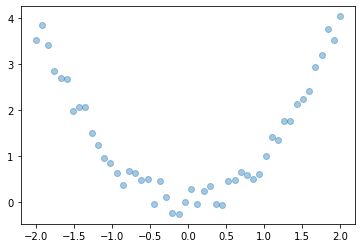

In [54]:
xs = np.linspace(-2,2)
ys = xs**2 + np.random.normal(0, 0.2, size = len(xs))

plt.plot(xs, ys, 'o', alpha = 0.4)

plt.show()

In [55]:
np.corrcoef(xs,ys)

array([[1.        , 0.03899559],
       [0.03899559, 1.        ]])

## Simple regression

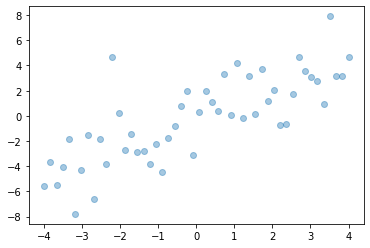

In [56]:
xs = np.linspace(-4,4)
ys = xs + np.random.normal(0, 2, size = len(xs))

plt.plot(xs, ys, 'o', alpha = 0.4)

plt.show()

In [57]:
from scipy.stats import linregress

res = linregress(xs, ys)

res

LinregressResult(slope=1.1121507011452798, intercept=-0.18276989883252695, rvalue=0.7792877342643546, pvalue=2.6281522152305226e-11, stderr=0.12908670270159409)

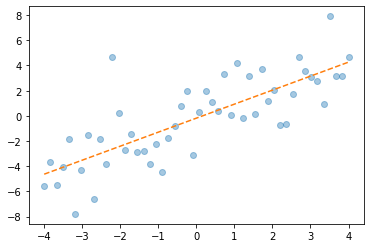

In [58]:
fx = np.array([xs.min(), xs.max()])
fy = fx*res.slope + res.intercept


plt.plot(xs, ys, 'o', alpha = 0.4)
plt.plot(fx, fy, '--')

plt.show()

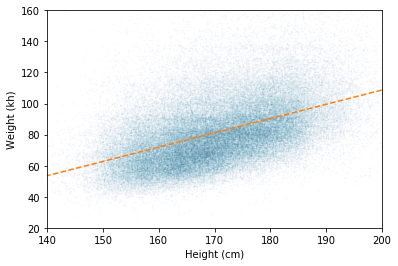

In [59]:
subset = brfss[['HTM4', 'WTKG3']].dropna()

res = linregress(subset['HTM4'], subset['WTKG3'])

fx = np.array([height_jitter.min(), height_jitter.max()])
fy = fx*res.slope + res.intercept

plt.plot(height_jitter, weight_jitter, 'o', alpha = 0.02, markersize = 1)
plt.plot(fx, fy, '--')

plt.axis([140,200,20,160])

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kh)')
plt.show()

# 4. Multivariate Thinking